<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/in_class_example_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
height, width = 150, 200

# Create a black image (all zeros)
X = np.zeros((height, width), dtype=np.uint8)

# Rectangle dimensions
rect_h, rect_w = 30, 60

# Calculate center position
center_y, center_x = height // 2, width // 2

# Calculate rectangle coordinates
top = center_y - (rect_h // 2)
bottom = center_y + (rect_h // 2)
left = center_x - (rect_w // 2)
right = center_x + (rect_w // 2)

# Draw the white rectangle (255)
X[top:bottom, left:right] = 255

print(f"Image shape: {X.shape}")
print(f"Rectangle coordinates: y({top}:{bottom}), x({left}:{right})")

Image shape: (150, 200)
Rectangle coordinates: y(60:90), x(70:130)


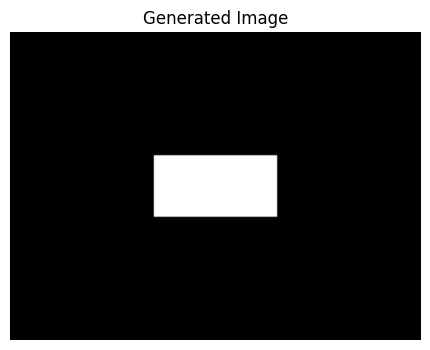

In [4]:
# Display the image
plt.figure(figsize=(6, 4))
plt.imshow(X, cmap='gray', vmin=0, vmax=255)
plt.title('Generated Image')
plt.axis('off')
plt.show()

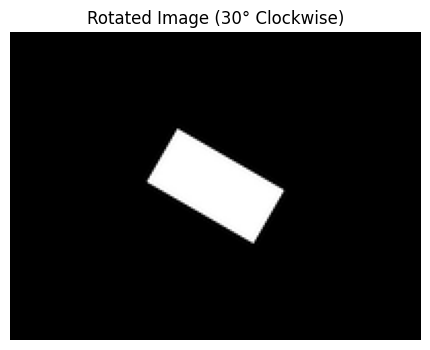

In [8]:
from scipy.ndimage import rotate

# Rotate the image 30 degrees clockwise (negative angle)
# reshape=False keeps the original image size (150x200)
# mode='constant' fills the new area with 0 (black)
X_rotated = rotate(X, -30, reshape=False, mode='constant', cval=0)

# Display the rotated image
plt.figure(figsize=(6, 4))
plt.imshow(X_rotated, cmap='gray')
plt.title('Rotated Image (30° Clockwise)')
plt.axis('off')
plt.show()

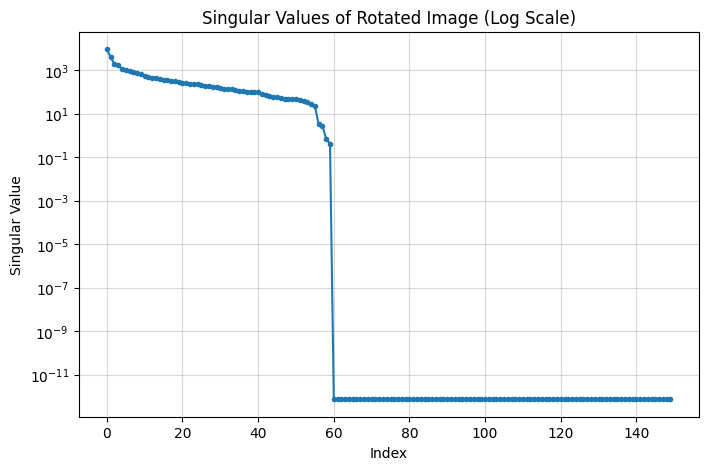

In [9]:
# Perform Economy SVD on the rotated image
U_rot, S_rot, Vt_rot = np.linalg.svd(X_rotated, full_matrices=False)

# Plot the singular values in log scale
plt.figure(figsize=(8, 5))
plt.plot(S_rot, marker='o', markersize=3)
plt.yscale('log')
plt.title('Singular Values of Rotated Image (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

In [5]:
# Perform Economy SVD
# full_matrices=False ensures we get the economy (reduced) SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f"Shape of U: {U.shape}")
print(f"Shape of S: {S.shape}")
print(f"Shape of Vt: {Vt.shape}")

Shape of U: (150, 150)
Shape of S: (150,)
Shape of Vt: (150, 200)


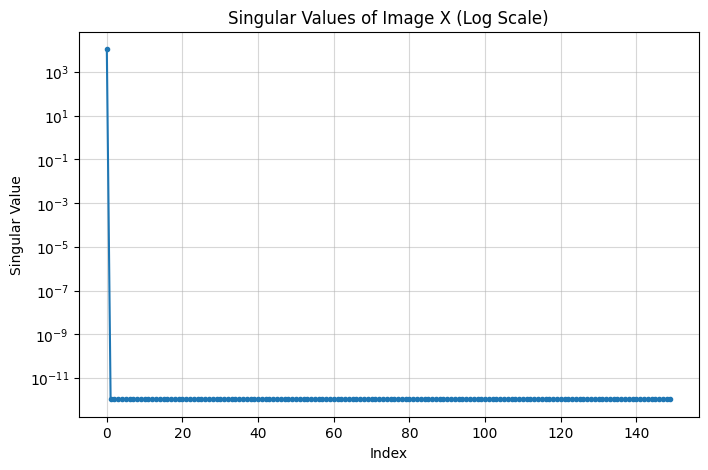

In [7]:
# Plot the singular values in log scale
plt.figure(figsize=(8, 5))
plt.plot(S, marker='o', markersize=3)
plt.yscale('log')
plt.title('Singular Values of Image X (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()